## Como estudiar ensembles de proteinas, Capitulo 1.
by CE Guisande Donadio

### Las proteinas como conjunto de datos.

En esta notebook pretendo desarollar un metodo para estudiar el espacio conformacional de las proteinas a partr de la construccion de *ensembles* entendidos como un diccionario cuyas llaves tienen la estrucrura PDBID_model_chain. Para esto se utilizara la informacion contenida en ensemble_data

In [2]:
import os
import ast


#liberarias de data science
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display, Markdown, Latex
import matplotlib.pyplot as plt
%matplotlib inline


path = "/home/emanuel/Documents/trabajo_actual/MegaScript"
verbose = False

In [3]:
#Tareas rutinarias

def cargar_txt_en_lista(file_path):
    return_list = []
    with open(file_path,"r") as openfile:
        for lines in openfile:
            return_list.append(lines.replace("\n",""))
            
    return return_list

def check_is_None(thing):
    if type(thing) == type (None):
        return True
    else:
        return False
    
def printd(text):
    display(Markdown(text))
    return    


In [4]:
ensemble_data = dict()
df_work =pd.read_csv("archivos_importantes/df_work_2019-12-11.tsv",sep="\t")
del df_work["Unnamed: 0"]
ed_filename = "archivos_importantes/ensemble_data_201912121148.csv"
#Si existe la version declarada arriba, lee los datos de ahi"
if os.path.isfile(ed_filename):
    printd ("El archivo existe")
    printd ("Cargando: `"+ed_filename+"`")
    df_reload = pd.read_csv(ed_filename)

    printd ("Ensemble data tiene: "+str(len(df_reload))+" lineas.")
    display(df_reload.head(n=2))

    #mete el df_relad en ensemble_data
    for index,uniprot_id  in enumerate(df_reload["UNIPROT_ID"]):
        print (index+1,"of",4060,end="\r")
        ensemble_data[uniprot_id] = dict()
        literal_list = ["PDB_CHAIN_LIST",  
               "PDB_in_df_work",
               "homologs_sprot",
               "homologs_in_df_work",
               "cd-hit-results-0.95_parsed",
               "cd-hit-sorted-0.95",
               "cd-hit-results-0.80_parsed",
               "cd-hit-sorted-0.80"]
        
        for labels in df_reload:
            if labels in literal_list:
                x = ast.literal_eval((df_reload.loc[(df_reload["UNIPROT_ID"]==uniprot_id)][labels].iat[0]))
            else:
                x = df_reload.loc[(df_reload["UNIPROT_ID"]==uniprot_id)][labels].iat[0]
            ensemble_data[uniprot_id][labels] = x
    
    #recalcula la list_under_20 
    list_under_20 = []
    for uniprot_id in list(df_work["UNIPROT_ID"]):
        if not uniprot_id in list(df_reload["UNIPROT_ID"]):
            list_under_20.append(uniprot_id)
    printd("list_under_20: "+str(len(list_under_20))+" lineas.")
else:
    printd("file not found")

El archivo existe

Cargando: `archivos_importantes/ensemble_data_201912121148.csv`

Ensemble data tiene: 4640 lineas.

,UNIPROT_ID,Entry_name,Status,Protein_names,Gene names,Organism,Length,Linage,Sequence,Taxonomic lineage IDs,...,homologs_sprot,homologs_in_df_work,homologos_sprot_fasta,cd-hit-results-0.95,cd-hit-results-0.95_parsed,cd-hit-sorted-0.95,cd-hit-results-0.80,cd-hit-results-0.80_parsed,cd-hit-sorted-0.80,seleccionados_full
0,A0QSL8,RPOA_MYCS2,reviewed,DNA-directed RNA polymerase subunit alpha (RNA...,rpoA MSMEG_1524 MSMEI_1488,Mycobacterium smegmatis (strain ATCC 700084 / ...,350,"cellular organisms, Bacteria, Terrabacteria gr...",MLISQRPTLSEETVAENRSRFVIEPLEPGFGYTLGNSLRRTLLSSI...,246196,...,"['Q8CX32', 'Q8A4A2', 'B5ZZ57', 'P92429', 'Q81V...","['P0A7Z4', 'Q9Z9H6', 'P9WGZ1', 'P0A7Z6', 'A7ZS...",fasta/homologs_sprot/A0QSL8_homologs_sprot.fasta,cd-hit-results-0.95/A0QSL8_cd-hit.clstr,"{'Cluster 0': [['P60315', True, 100.0]], 'Clus...","{30: [('Q7YJU6', 30.068), ('Q0ZIY7', 30.068), ...",cd-hit-results-0.80/A0QSL8_cd-hit.clstr,"{'Cluster 0': [['P60315', True, 100.0]], 'Clus...","{30: [('A6H5L3', 30.435), ('Q14FC5', 30.508000...","['Q7YJU6', 'A6H5L3', 'P60314', 'Q09WY5', 'Q85F..."
1,A0R066,ILVE_MYCS2,reviewed,Branched-chain-amino-acid aminotransferase (BC...,ilvE MSMEG_4276 MSMEI_4176,Mycobacterium smegmatis (strain ATCC 700084 / ...,368,"cellular organisms, Bacteria, Terrabacteria gr...",MNSGPLEFTVSANTNPATDAVRESILANPGFGKYYTDHMVSIDYTV...,246196,...,"['O32954', 'P54690', 'A9UZ24', 'K7QKH1', 'P242...","['P0AB80', 'O15382', 'P54687']",fasta/homologs_sprot/A0R066_homologs_sprot.fasta,cd-hit-results-0.95/A0R066_cd-hit.clstr,"{'Cluster 0': [['O14370', True, 100.0]], 'Clus...","{30: [('K0E3V3', 31.288), ('Q58414', 31.399), ...",cd-hit-results-0.80/A0R066_cd-hit.clstr,"{'Cluster 0': [['O14370', True, 100.0]], 'Clus...","{30: [('K0E3V3', 31.288), ('Q58414', 31.399), ...",NaN


list_under_20: 5525 lineas.

In [322]:
obsolete_dict = dict()
do_not_download = list()
with  open("archivos_importantes/obsolete.dat","r") as openfile:
    for lines in openfile:
        original = lines.replace("\n","")[20:24]
        new = lines.replace("\n","")[29:33]
        do_not_download.append(original)
        if new == "":
            obsolete_dict[original] = None
        else:
            obsolete_dict[original] = new

In [313]:
#Funciones para trabajar con proteinas

def bajar_estructura(pdb_id):
    os.chdir(path+"/ent_files/")
    filename ="pdb"+pdb_id.lower()+".ent"
    url = "ftp://ftp.wwpdb.org/pub/pdb/data/structures/divided/pdb/"+pdb_id.lower()[1:3]+"/pdb"+pdb_id.lower()+".ent.gz"
    
    #Verifica que el archivo no exista antes de intentar bajarlo.
    if not os.path.isfile(filename):
        #os.system("wget ftp://ftp.wwpdb.org/pub/pdb/data/structures/all/pdb/pdb"+pdb_id.lower()+".ent.gz")
        wget_code = os.system("wget "+url)
        #Si el archivo no existe en el servidor, fue declarado obsoleto.
        #Da codigo de error 2048
        if wget_code == 2048:
            os.chdir(path)
            return ("OBSOLETE")
        #Uncompress
        os.system("gunzip pdb"+pdb_id.lower()+".ent.gz")
    else:
        if verbose: print ("\t","File "+filename+" already exists")
    os.chdir(path)
    return filename

def read_chains(path_to_pdbfile):
    chain_list = []
    with open(path_to_pdbfile,"r") as openfile:
        for row in openfile:
            if "COMPND" in row:
                a =row.replace("\n","").split(": ")[0].split(" ")[-1]
                
                if a=="CHAIN":
                    b = row.replace("\n","").split(": ")[1].split(";")[0]
                    chain_list.append(b)
    return chain_list

#Le das un archivo y le el EXPDTA u NUMMDL
def read_expdata(path_to_pdbfile):
    with open(path_to_pdbfile,"r") as openfile:
        expdata = ""
        nummodel = 1
        for row in openfile:
            if "EXPDTA" in row:
                expdata +=  (row[9:-1].strip())
                if "X-RAY" in expdata:
                    break
                else:
                    continue
            elif "NUMMDL" in row:
                nummodel = int((row[9:-1].strip()))
                break
            elif "REMARK" in row:
                break
            elif "ATOM" in row:
                break
    return expdata,nummodel

def read_chains(path_to_pdbfile):
    chain_list = []
    with open(path_to_pdbfile,"r") as openfile:
        for row in openfile:
            if "COMPND" in row:
                a =row.replace("\n","").split(": ")[0].split(" ")[-1]
                
                if a=="CHAIN":
                    b = row.replace("\n","").split(": ")[1].split(";")[0]
                    if ", " in b:
                        b = b.replace(" ","").split(",")
                        chain_list +=(b)
                    else:
                        chain_list.append(b)
    return chain_list





def read_atom_full(pdb_file):
    expdata,nummodel = read_expdata(pdb_file)
    return_dict = dict()
    with open(pdb_file,"r") as openfile:
        model = 1
        return_dict[1]= list()
        for row in openfile:
            line_lst = list()
            if nummodel>1:
                if row[0:6] == "ENDMDL":
                    model +=1
                    if model > nummodel:
                        break
                    return_dict[model]= list()
            if row[0:5] == "ATOM ":
                tmp_lst = []
                tmp_lst.append(int(row[6:10+1])) #Integer serial Atom serial number.
                tmp_lst.append(row[12:15+1].strip()) #Atom name Atom name.
                tmp_lst.append(row[16+1]) #Character altLoc Alternate location indicator.
                tmp_lst.append(row[17:19+1]) #Residue name resName Residue name.
                tmp_lst.append(row[21]) #Character chainID Chain identifier.
                tmp_lst.append(int(row[22:25+1])) #Integer resSeq Residue sequence number.
                tmp_lst.append(row[26+1]) #AChar iCode Code for insertion of residues.
                tmp_lst.append(row[30:37+1]) #Real(8.3) x Orthogonal coordinates for X in Angstroms.
                tmp_lst.append(row[38:45+1]) #Real(8.3) y Orthogonal coordinates for Y in Angstroms.
                tmp_lst.append(row[46:53+1]) #Real(8.3) z Orthogonal coordinates for Z in Angstroms.
                tmp_lst.append(row[54:59+1]) #Real(6.2) occupancy Occupancy.
                tmp_lst.append(row[60:65+1]) #Real(6.2) tempFactor Temperature factor.
                tmp_lst.append(row[76:77+1]) #LString(2) element Element symbol, right-justified.
                tmp_lst.append(row[78:89+1].replace("\n","")) #LString(2) charge Charge on the atom.
                return_dict[model].append(tmp_lst)
            
    return expdata,nummodel,return_dict

def print_fixed(query_str,fix=100):
    for index,char in enumerate(query_str):
        print (char,end="")
        if (index+1)%fix ==0:
            print ("")
    print ("")
    return


def read_and_parse_pdb_file(pdb_id,chain):
    ensemblito = dict()
    expdata,nummodel,raw =  read_atom_full("ent_files/"+bajar_estructura(pdb_id))
    for model in raw:
        seq_stru = dict()
        for atom in raw[model]:
            if (atom[1] == "CA") and (atom[4] == chain):
                x = float(atom[7])
                y = float(atom[8])
                z = float(atom[9])
                cord = (x,y,z)
                seq_stru[int(atom[5])]=[atom[3],cord]
        ensemblito[model] = seq_stru    
    return expdata,nummodel,ensemblito


#Diccionario 3-to-1 AA
d = {'CYS': 'C', 'ASP': 'D', 'SER': 'S', 'GLN': 'Q', 'LYS': 'K',
     'ILE': 'I', 'PRO': 'P', 'THR': 'T', 'PHE': 'F', 'ASN': 'N', 
     'GLY': 'G', 'HIS': 'H', 'LEU': 'L', 'ARG': 'R', 'TRP': 'W', 'TER':'*',
     'ALA': 'A', 'VAL':'V', 'GLU': 'E', 'TYR': 'Y', 'MET': 'M','XAA':'X'}        



In [320]:
del conjunto_de_cordenadas

read_chains("ent_files/pdb1j40.ent")


['A', 'C', 'E', 'G', 'B', 'D', 'F', 'H']

In [333]:
def distance(tuple_a,tuple_b):
    dx = tuple_a[0] - tuple_b[0]
    dy = tuple_a[1] - tuple_b[1]
    dz = tuple_a[2] - tuple_b[2]
    dist = (dx**2 +  dy**2 + dz**2 ) ** 0.5
    return dist



def mapear_structuras(uniprot_id):
    conjunto_de_cordenadas = dict()
    print("Load PDB")
    for pdb_id in ensemble_data[uniprot_id]["PDB_in_df_work"]:
        if not pdb_id in do_not_download:
            ent= bajar_estructura(pdb_id)
            if ent != "OBSOLETE":
                entfile ="ent_files/"+ent
                chains = read_chains(entfile)
                for chain in chains:
                    if pdb_id+"_"+chain in ensemble_data[uniprot_id]["PDB_CHAIN_LIST"]:
                        expdata,nummodel,ensemblito = read_and_parse_pdb_file(pdb_id,chain)
                        for model in ensemblito:
                            cord_id = pdb_id+"_"+str(model)+"_"+chain

                            conjunto_de_cordenadas[cord_id] = ensemblito[model]
                    else:
                        pass
                        #print (pdb_id,chain," error")
            else:
                next
    print("Calculate vectors")
    conjunto = dict()
    full_seq = ensemble_data[uniprot_id]["Sequence"]
    for fixed,aa_original in enumerate(ensemble_data[uniprot_id]["Sequence"]):
        conjunto[fixed+1] = dict()
        for item in conjunto_de_cordenadas.keys():
            if not check_is_None(conjunto_de_cordenadas[item].get(fixed+1)):
                aa_stru = d[conjunto_de_cordenadas[item][fixed+1][0]]
                mutated = (aa_original != aa_stru)
                cord1 = conjunto_de_cordenadas[item][fixed+1][1:][0]
                for pos in range(0,len(full_seq)):
                    if not check_is_None(conjunto_de_cordenadas[item].get(pos+1)):
                        cord2  = conjunto_de_cordenadas[item][pos+1][1:][0]
                        dist = distance(cord1,cord2)
                        if check_is_None( conjunto[(fixed+1)].get(pos+1) ):
                            conjunto[fixed+1][pos+1] = dict()

                        conjunto[fixed+1][pos+1][item] = (dist,mutated)
    print ("Map vectors")
    
    dist_map = []
    std_map = []


    for i in range(1,len(full_seq)+1):
        line_dist = []
        line_std = []

        for j in range(1,len(full_seq)+1):
            if not check_is_None(conjunto[i].get(j)):
                serie = [conjunto[i][j][item][0] for item in conjunto[i][j].keys()]
                ave = np.average(serie)
                std = np.std(serie)
                cross = ave*ave
                #print (i,j,ave,std)
                line_dist.append(ave)
                line_std.append(std)
            else:
                line_dist.append(None)
                line_std.append(None)
                

            if (ave<10) and (std<1.5):
                line_cat.append(0)
            elif (ave<10) and (std>1.5):
                line_cat.append(0.25)
            elif (ave>10) and (std<1.5):
                line_cat.append(0.5)
            elif (ave>10) and (std>1.5):
                line_cat.append(1)



        dist_map.append(line_dist)
        std_map.append(line_std)
        rango_map.append(line_rango)
        cross_map.append(line_cross)
        cat_map.append(line_cat)
    
    return list(conjunto_de_cordenadas.keys()),dist_map,std_map

maping_by_uniprot=dict()

P69905
Load PDB
Calculate vectors
Map vectors
P68871
Load PDB
Calculate vectors
Map vectors


### P69905

Hemoglobin subunit alpha (Alpha-globin) (Hemoglobin alpha chain)

Confs 592

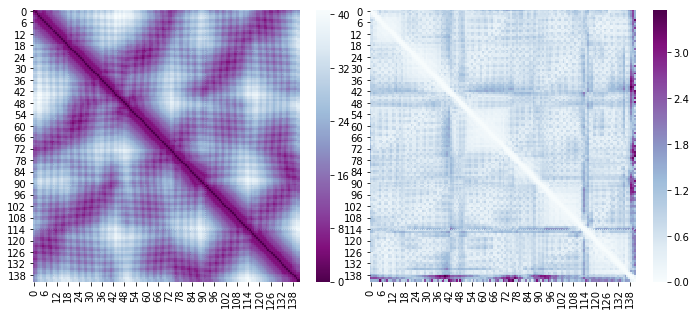

### P68871

Hemoglobin subunit beta (Beta-globin) (Hemoglobin beta chain) [Cleaved into: LVV-hemorphin-7; Spinorphin]

Confs 588

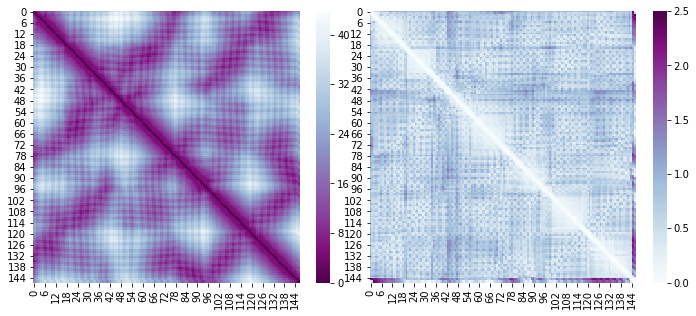

In [335]:
for uniprot_id in ["P69905","P68871"]:
    print (uniprot_id)
    confs,dist_map,std_map = mapear_structuras(uniprot_id)
    maping_by_uniprot[uniprot_id] = {"dist":dist_map,"std":std_map,"confs":confs}

for uniprot_id in ["P69905","P68871"]:
    printd("### "+uniprot_id)
    printd(ensemble_data[uniprot_id]["Protein_names"])
    printd ("Confs "+ str(len(maping_by_uniprot[uniprot_id]["confs"])))
    fig, (ax,ax2) = plt.subplots(ncols=2,figsize=(12,5))
    fig.subplots_adjust(wspace=0.01)
    sns.heatmap( maping_by_uniprot[uniprot_id]["dist"], cmap="BuPu_r", ax=ax )
    sns.heatmap( maping_by_uniprot[uniprot_id]["std"], cmap="BuPu", ax=ax2 )
    plt.show()

Load PDB
Calculate vectors
Map vectors
136
['5XF3_1_C', '5XF3_1_G', '3AZI_1_C', '3AZI_1_G', '5AV5_1_C', '5AV5_1_G', '5AY8_1_C', '5AY8_1_G', '5CPI_1_C', '5CPI_1_G', '5X7X_1_C', '5X7X_1_G', '6BUZ_1_C', '6BUZ_1_G', '3WTP_1_C', '3WTP_1_G', '3A6N_1_C', '5GTC_1_C', '5GTC_1_G', '3AYW_1_C', '3AYW_1_G', '3AV2_1_C', '3AV2_1_G', '4YM6_1_C', '4YM6_1_G', '5B2I_1_C', '5B2I_1_G', '3X1S_1_C', '3X1S_1_G', '3AZM_1_C', '3AZM_1_G', '5CPJ_1_C', '5CPJ_1_G', '5XF5_1_C', '5XF5_1_G', '5AVC_1_C', '5AVC_1_G', '5B32_1_C', '3W96_1_C', '3W96_1_G', '5AV8_1_C', '5AV8_1_G', '5JRG_1_C', '5JRG_1_G', '5B24_1_C', '5B24_1_G', '5GSE_1_C', '5GSE_1_G', '5GSE_1_M', '3AZE_1_C', '3AZE_1_G', '3WKJ_1_C', '3WKJ_1_G', '3AFA_1_C', '5AV6_1_C', '5AV6_1_G', '3W98_1_C', '3W98_1_G', '3W99_1_C', '3W99_1_G', '3AZK_1_C', '3AZK_1_G', '5AVB_1_C', '5AVB_1_G', '5XF4_1_C', '5XF4_1_G', '3AZF_1_C', '3AZF_1_G', '3AZN_1_C', '3AZN_1_G', '5B2J_1_C', '5B2J_1_G', '3AZJ_1_C', '3AZJ_1_G', '5B31_1_C', '4YM5_1_C', '4YM5_1_G', '3W97_1_C', '3W97_1_G', '3AZH_1_

### P04908

Histone H2A type 1-B/E (Histone H2A.2) (Histone H2A/a) (Histone H2A/m)

Confs 136

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

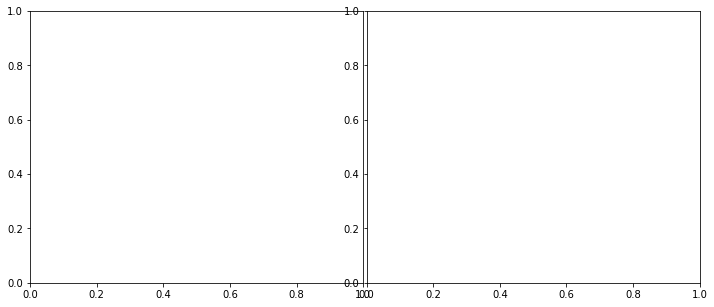

In [334]:
uniprot_id = "P04908"

confs,dist_map,std_map = mapear_structuras(uniprot_id)
print (len(confs))
print (confs)
maping_by_uniprot[uniprot_id] = {"dist":dist_map,"std":std_map,"confs":confs}
printd("### "+uniprot_id)
printd(ensemble_data[uniprot_id]["Protein_names"])
printd ("Confs "+ str(len(maping_by_uniprot[uniprot_id]["confs"])))
fig, (ax,ax2) = plt.subplots(ncols=2,figsize=(12,5))
fig.subplots_adjust(wspace=0.01)
sns.heatmap( maping_by_uniprot[uniprot_id]["dist"], cmap="BuPu_r", ax=ax )
sns.heatmap( maping_by_uniprot[uniprot_id]["std"], cmap="BuPu", ax=ax2 )
plt.show()


In [ ]:

expdata,nummodel,ensemblito = read_and_parse_pdb_file("2MWY","A")

            

conjunto = dict()
for model in ensemblito:
    #esto crea la matris de distancias.
    sequ = ""
    vector =dict()
    seq_str = ensemblito[model]
    for i in seq_str:
        if check_is_None(vector.get(i)):
            vector[i] = dict()
        sequ += d[seq_str[i][0]]
        for j in seq_str:
            cord1 = seq_str[i][1]
            cord2 = seq_str[j][1]

            dist=( (cord2[0]-cord1[0])**2 + (cord2[1]-cord1[1])**2 + (cord2[2]-cord1[2])**2) ** 0.5
            vector [i][j] = dist 


    ij_map = list()
    for i in vector:
        show = ""
        for j in vector[i]:
            if vector[i][j] < 10:
                show+=str(int(vector[i][j]))
            else: 
                show+="-"
        ij_map.append(show)
    conjunto[model] = {"sequence":sequ,"vector":vector,"ij_map":ij_map}
    
    
    aver_map = dict()


for model in range(1,model+1):
    for fixed in list(conjunto[model]["vector"].keys()):
        if check_is_None(aver_map.get(fixed)):
            aver_map[fixed] = dict()
        for r in (conjunto[model]["vector"][i]):
            if check_is_None(aver_map[fixed].get(r)):
                aver_map[fixed][r] = list()
            dist = conjunto[model]["vector"][fixed][r]
            aver_map[fixed][r].append(dist)

In [ ]:

contact_map_full =  []
std_map_full = []



for fixed in aver_map:
    # print (fixed)
    contact_map =[]
    std_map =[]
    
    for pos in aver_map[fixed]:
        mean = np.mean(aver_map[fixed][pos])
        median  = calc_median(aver_map[fixed][pos])
        std = np.std(aver_map[fixed][pos])
        #print ("\t",pos,mean,std)
        
        if (pos > fixed+1 )or (pos <fixed-1):
            #10 amstrom
            if median<10:            
                contact_map.append(1)
            else:
                contact_map.append(0)

            #1 de std
            if std>0.7:
                std_map.append(1)
            else:
                std_map.append(0)
        else:
            contact_map.append(0)
            std_map.append(0)
                


    contact_map_full.append (contact_map)
    std_map_full.append(std_map)

x_list = []
y_list = []

print (sequ)
for n in range(0,len(aver_map)):
    x = sum(contact_map_full[n])
    x_list.append(x)
    
for n in range(0,len(aver_map)):
    y = sum(std_map_full[n])
    y_list.append(y)
    
x_list = [(x/len(x_list)) for x in x_list]
y_list = [(y/len(y_list)) for y in y_list]
    
for x in x_list:
    print(int(x*10),end="")
print ("")

for y in y_list:
    print(int(y*10),end="")
print ("")


plt.plot(x_list, y_list,"o")
plt.show()    

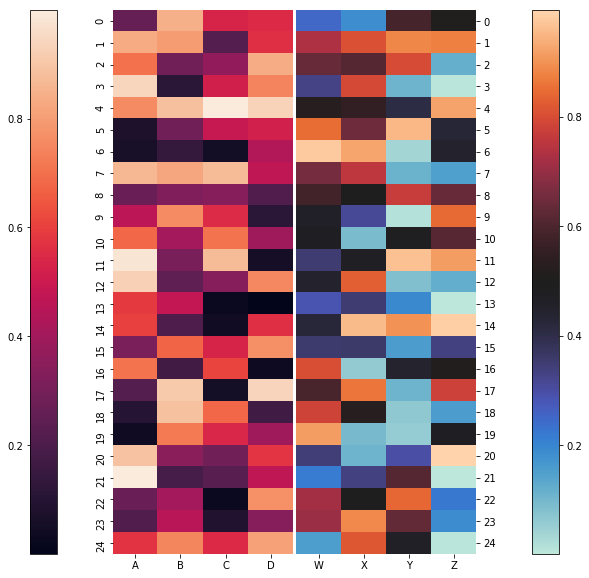

In [11]:




dfx= pd.DataFrame(aver_map)
dfx.head()


df =  pd.DataFrame(np.random.rand(25,4), columns=list("ABCD"))
df2 = pd.DataFrame(np.random.rand(25,4), columns=list("WXYZ"))

fig, (ax,ax2) = plt.subplots(ncols=2,figsize=(10,10))
fig.subplots_adjust(wspace=0.01)
sns.heatmap(df, cmap="rocket", ax=ax, cbar=False)
fig.colorbar(ax.collections[0], ax=ax,location="left", use_gridspec=False, pad=0.2)
sns.heatmap(df2, cmap="icefire", ax=ax2, cbar=False)
fig.colorbar(ax2.collections[0], ax=ax2,location="right", use_gridspec=False, pad=0.2)
ax2.yaxis.tick_right()
ax2.tick_params(rotation=0)
plt.show()